Load data and import database

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Load dataset

In [3]:
#load file
diabetes_data = 'diabetes.csv'
df = pd.read_csv(diabetes_data)
#print
print(df.columns)
print(df.head())
df.head()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

print("IQR for each feature:")
print(IQR)

IQR for each feature:
Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64


Data Preprocessing

In [5]:
#View and statistical data information
df.info(verbose=True)
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
#check if theres missing value
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
#replaced to NaN
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [8]:
#using the mean fill the missing value
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

In [11]:
#data separation
X = df_copy.drop('Outcome', axis=1)  # feature
y = df_copy['Outcome']  # label

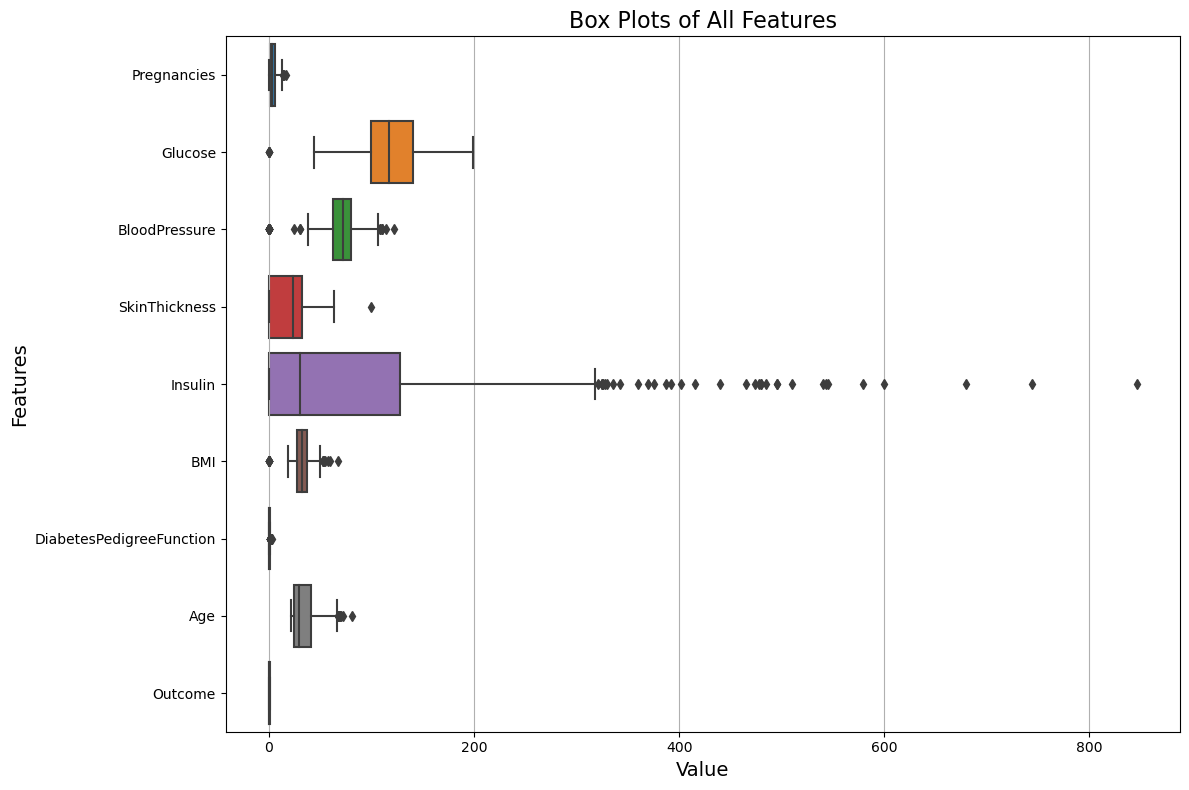

In [12]:
features = df.columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[features], orient="h")
plt.title('Box Plots of All Features', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(axis='x') 
plt.tight_layout()
plt.show()


Model Selection and Training and Evaluation in original(different with lr)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class Perceptron(nn.Module):
    def __init__(self, input_size):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(input_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

# Convert data to tensor
X_train_t = torch.FloatTensor(X_train.values)
y_train_t = torch.FloatTensor(y_train.values).view(-1, 1)
X_test_t = torch.FloatTensor(X_test.values)
y_test_t = torch.FloatTensor(y_test.values).view(-1, 1)

# Epochs and learning rates to test
epochs_list = [10, 100,500]
learning_rates = [0.1, 0.01, 0.001]

# Loop over different learning rates
for lr in learning_rates:
    print(f'Testing with learning rate: {lr}')
    
    for epochs in epochs_list:
        model = Perceptron(input_size=X_train.shape[1])
        criterion = nn.BCELoss()
        optimizer = optim.SGD(model.parameters(), lr=lr)
        
        train_accuracies = []
        test_accuracies = []

        for _ in range(epochs):
            model.train()
            optimizer.zero_grad()
            outputs = model(X_train_t)
            loss = criterion(outputs, y_train_t)
            
            loss.backward()
            optimizer.step()

            with torch.no_grad():
                model.eval()
                y_train_pred = (outputs >= 0.5).float()
                y_test_pred = (model(X_test_t) >= 0.5).float()

                train_accuracy = accuracy_score(y_train_t.numpy(), y_train_pred.numpy()) * 100
                test_accuracy = accuracy_score(y_test_t.numpy(), y_test_pred.numpy()) * 100
                
                train_accuracies.append(train_accuracy)
                test_accuracies.append(test_accuracy)

        print(f'Training with {epochs} epochs...')
        print(f'{epochs} epochs - Train Accuracy: {train_accuracies[-1]:.2f}%')
        print(f'{epochs} epochs - Test Accuracy: {test_accuracies[-1]:.2f}%')
        print()


Testing with learning rate: 0.1
Training with 10 epochs...
10 epochs - Train Accuracy: 65.31%
10 epochs - Test Accuracy: 64.29%

Training with 100 epochs...
100 epochs - Train Accuracy: 34.69%
100 epochs - Test Accuracy: 35.71%

Training with 500 epochs...
500 epochs - Train Accuracy: 65.31%
500 epochs - Test Accuracy: 64.29%

Testing with learning rate: 0.01
Training with 10 epochs...
10 epochs - Train Accuracy: 34.69%
10 epochs - Test Accuracy: 35.71%

Training with 100 epochs...
100 epochs - Train Accuracy: 34.69%
100 epochs - Test Accuracy: 35.71%

Training with 500 epochs...
500 epochs - Train Accuracy: 65.31%
500 epochs - Test Accuracy: 64.29%

Testing with learning rate: 0.001
Training with 10 epochs...
10 epochs - Train Accuracy: 43.97%
10 epochs - Test Accuracy: 47.40%

Training with 100 epochs...
100 epochs - Train Accuracy: 64.66%
100 epochs - Test Accuracy: 37.01%

Training with 500 epochs...
500 epochs - Train Accuracy: 65.64%
500 epochs - Test Accuracy: 50.65%



Original table collection
| Learning Rate | Epochs | Train Accuracy (%) | Test Accuracy (%) |
|---------------|--------|--------------------|-------------------|
| 0.1           | 10     | 65.31              | 64.29             |
| 0.1           | 100    | 34.69              | 35.71             |
| 0.1           | 500    | 65.31              | 64.29             |
| 0.01          | 10     | 34.69              | 35.71             |
| 0.01          | 100    | 34.69              | 35.71             |
| 0.01          | 500    | 65.31              | 64.29             |
| 0.001         | 10     | 43.97              | 47.40             |
| 0.001         | 100    | 64.66              | 37.01             |
| 0.001         | 500    | 65.64              | 50.65             |





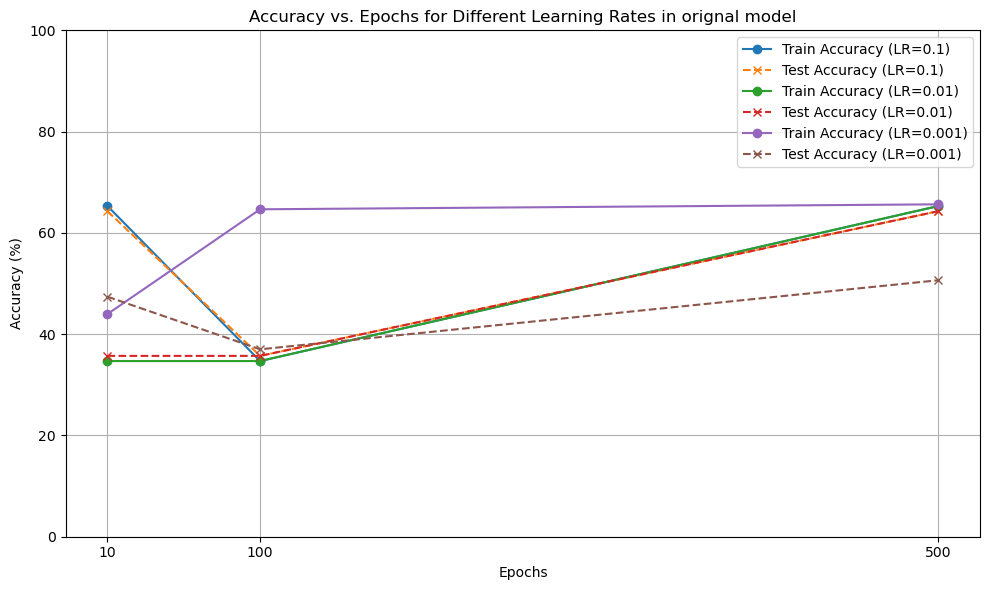

In [11]:
data = [
    (0.1, 10, 65.31, 64.29),
    (0.1, 100, 34.69, 35.71),
    (0.1, 500, 65.31, 64.29),
    (0.01, 10, 34.69, 35.71),
    (0.01, 100, 34.69, 35.71),
    (0.01, 500, 65.31, 64.29),
    (0.001, 10, 43.97, 47.40),
    (0.001, 100, 64.66, 37.01),
    (0.001, 500, 65.64, 50.65)
]

dataplt = {}
for lr, epoch, train_acc, test_acc in data:
    if lr not in dataplt:
        dataplt[lr] = ([], [], [])  # (epochs, train_acc, test_acc)
    dataplt[lr][0].append(epoch)
    dataplt[lr][1].append(train_acc)
    dataplt[lr][2].append(test_acc)

#draw
plt.figure(figsize=(10, 6))
for lr, (epochs, train_acc, test_acc) in dataplt.items():
    plt.plot(epochs, train_acc, marker='o', label=f'Train Accuracy (LR={lr})')
    plt.plot(epochs, test_acc, marker='x', linestyle='--', label=f'Test Accuracy (LR={lr})')

#plt seting
plt.title('Accuracy vs. Epochs for Different Learning Rates in orignal model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.xticks([10, 100, 500])
plt.ylim(0, 100)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [12]:
#delete outliers
df = df.dropna()
z_scores = np.abs(stats.zscore(df))
threshold = 3
df_clean = df[(z_scores < threshold).all(axis=1)]

X_clean = df_clean.drop(columns=['Outcome'])
y_clean = df_clean['Outcome'].values 

#standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

# PCA
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_scaled)

# Split the dataset into training sets and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_clean, test_size=0.2, random_state=42)

class Perceptron(nn.Module):
    def __init__(self, input_size):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(input_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

# Convert data to tensor
X_train_t = torch.FloatTensor(X_train)
y_train_t = torch.FloatTensor(y_train).view(-1, 1)
X_test_t = torch.FloatTensor(X_test)
y_test_t = torch.FloatTensor(y_test).view(-1, 1)

# Epochs and learning rates to test
epochs_list = [10, 100, 500]
learning_rates = [0.1, 0.01, 0.001]

# Loop over different learning rates
for lr in learning_rates:
    print(f'Testing with learning rate: {lr}')
    
    for epochs in epochs_list:
        model = Perceptron(input_size=X_train.shape[1])
        criterion = nn.BCELoss()
        optimizer = optim.SGD(model.parameters(), lr=lr)
        
        train_accuracies = []
        test_accuracies = []

        for _ in range(epochs):
            model.train()
            optimizer.zero_grad()
            outputs = model(X_train_t)
            loss = criterion(outputs, y_train_t)
            
            loss.backward()
            optimizer.step()

            with torch.no_grad():
                model.eval()
                y_train_pred = (outputs >= 0.5).float()
                y_test_pred = (model(X_test_t) >= 0.5).float()

                train_accuracy = accuracy_score(y_train_t.numpy(), y_train_pred.numpy()) * 100
                test_accuracy = accuracy_score(y_test_t.numpy(), y_test_pred.numpy()) * 100
                
                train_accuracies.append(train_accuracy)
                test_accuracies.append(test_accuracy)

        print(f'Training with {epochs} epochs...')
        print(f'{epochs} epochs - Train Accuracy: {train_accuracies[-1]:.2f}%')
        print(f'{epochs} epochs - Test Accuracy: {test_accuracies[-1]:.2f}%')
        print()


Testing with learning rate: 0.1
Training with 10 epochs...
10 epochs - Train Accuracy: 73.27%
10 epochs - Test Accuracy: 66.67%

Training with 100 epochs...
100 epochs - Train Accuracy: 79.27%
100 epochs - Test Accuracy: 76.81%

Training with 500 epochs...
500 epochs - Train Accuracy: 79.64%
500 epochs - Test Accuracy: 76.09%

Testing with learning rate: 0.01
Training with 10 epochs...
10 epochs - Train Accuracy: 73.45%
10 epochs - Test Accuracy: 64.49%

Training with 100 epochs...
100 epochs - Train Accuracy: 67.82%
100 epochs - Test Accuracy: 61.59%

Training with 500 epochs...
500 epochs - Train Accuracy: 76.55%
500 epochs - Test Accuracy: 71.01%

Testing with learning rate: 0.001
Training with 10 epochs...
10 epochs - Train Accuracy: 36.55%
10 epochs - Test Accuracy: 42.03%

Training with 100 epochs...
100 epochs - Train Accuracy: 58.73%
100 epochs - Test Accuracy: 53.62%

Training with 500 epochs...
500 epochs - Train Accuracy: 60.55%
500 epochs - Test Accuracy: 59.42%



Standardized collection table
| Learning Rate | Epochs | Train Accuracy (%) | Test Accuracy (%) |
|---------------|--------|--------------------|-------------------|
| 0.1           | 10     | 73.27              | 66.67             |
| 0.1           | 100    | 79.27              | 76.81             |
| 0.1           | 500    | 79.64              | 76.09             |
| 0.01          | 10     | 73.45              | 64.49             |
| 0.01          | 100    | 67.82              | 61.59             |
| 0.01          | 500    | 76.55              | 71.01             |
| 0.001         | 10     | 36.55              | 42.03             |
| 0.001         | 100    | 58.73              | 53.62             |
| 0.001         | 500    | 60.55              | 59.42             |


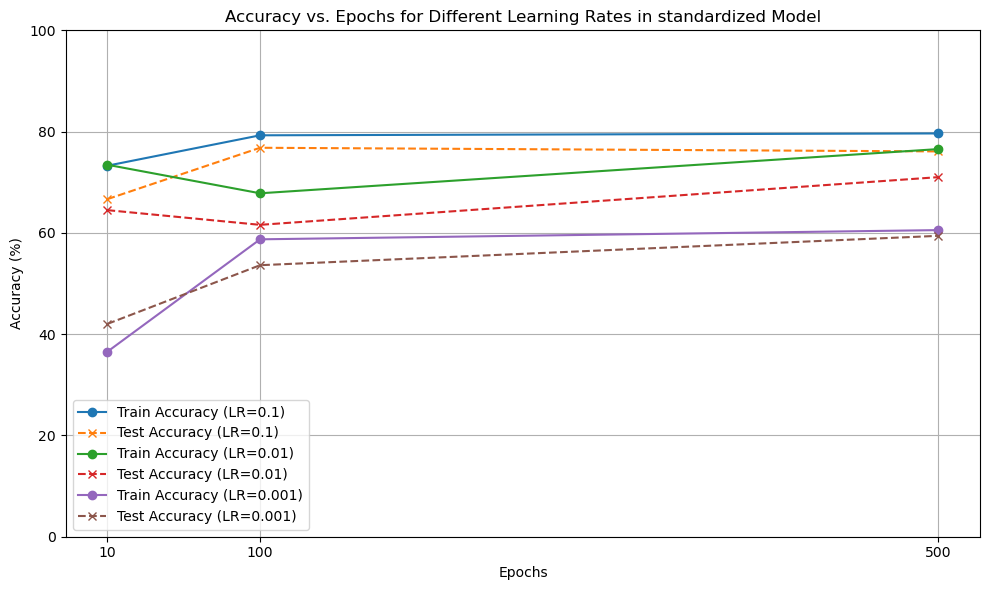

In [13]:
data = [
    (0.1, 10, 73.27, 66.67),
    (0.1, 100, 79.27, 76.81),
    (0.1, 500, 79.64, 76.09),
    (0.01, 10, 73.45, 64.49),
    (0.01, 100, 67.82, 61.59),
    (0.01, 500, 76.55, 71.01),
    (0.001, 10, 36.55, 42.03),
    (0.001, 100, 58.73, 53.62),
    (0.001, 500, 60.55, 59.42),
]

dataplt = {}
for lr, epoch, train_acc, test_acc in data:
    if lr not in dataplt:
        dataplt[lr] = ([], [], [])  # (epochs, train_acc, test_acc)
    dataplt[lr][0].append(epoch)
    dataplt[lr][1].append(train_acc)
    dataplt[lr][2].append(test_acc)

#draw
plt.figure(figsize=(10, 6))
for lr, (epochs, train_acc, test_acc) in dataplt.items():
    plt.plot(epochs, train_acc, marker='o', label=f'Train Accuracy (LR={lr})')
    plt.plot(epochs, test_acc, marker='x', linestyle='--', label=f'Test Accuracy (LR={lr})')

#plt setting
plt.title('Accuracy vs. Epochs for Different Learning Rates in standardized Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.xticks([10, 100, 500])
plt.ylim(0, 100)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [14]:
selector = SelectKBest(score_func=chi2, k=3)
X_new = selector.fit_transform(X, y)

#delete outliers
df = df.dropna()
z_scores = np.abs(stats.zscore(df))
threshold = 3
df_clean = df[(z_scores < threshold).all(axis=1)]

X_clean = df_clean.drop(columns=['Outcome'])
y_clean = df_clean['Outcome'].values 

#standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

# PCA
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_scaled)

# Split the dataset into training sets and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_clean, test_size=0.2, random_state=42)

class Perceptron(nn.Module):
    def __init__(self, input_size):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(input_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

# Convert data to tensor
X_train_t = torch.FloatTensor(X_train)
y_train_t = torch.FloatTensor(y_train).view(-1, 1)
X_test_t = torch.FloatTensor(X_test)
y_test_t = torch.FloatTensor(y_test).view(-1, 1)

# Epochs and learning rates to test
epochs_list = [10, 100, 500]
learning_rates = [0.1, 0.01, 0.001]

# Loop over different learning rates
for lr in learning_rates:
    print(f'Testing with learning rate: {lr}')
    
    for epochs in epochs_list:
        model = Perceptron(input_size=X_train.shape[1])
        criterion = nn.BCELoss()
        optimizer = optim.SGD(model.parameters(), lr=lr)
        
        train_accuracies = []
        test_accuracies = []

        for _ in range(epochs):
            model.train()
            optimizer.zero_grad()
            outputs = model(X_train_t)
            loss = criterion(outputs, y_train_t)
            
            loss.backward()
            optimizer.step()

            with torch.no_grad():
                model.eval()
                y_train_pred = (outputs >= 0.5).float()
                y_test_pred = (model(X_test_t) >= 0.5).float()

                train_accuracy = accuracy_score(y_train_t.numpy(), y_train_pred.numpy()) * 100
                test_accuracy = accuracy_score(y_test_t.numpy(), y_test_pred.numpy()) * 100
                
                train_accuracies.append(train_accuracy)
                test_accuracies.append(test_accuracy)

        print(f'Training with {epochs} epochs...')
        print(f'{epochs} epochs - Train Accuracy: {train_accuracies[-1]:.2f}%')
        print(f'{epochs} epochs - Test Accuracy: {test_accuracies[-1]:.2f}%')
        print()


Testing with learning rate: 0.1
Training with 10 epochs...
10 epochs - Train Accuracy: 67.27%
10 epochs - Test Accuracy: 70.29%

Training with 100 epochs...
100 epochs - Train Accuracy: 78.00%
100 epochs - Test Accuracy: 74.64%

Training with 500 epochs...
500 epochs - Train Accuracy: 79.82%
500 epochs - Test Accuracy: 76.09%

Testing with learning rate: 0.01
Training with 10 epochs...
10 epochs - Train Accuracy: 40.91%
10 epochs - Test Accuracy: 43.48%

Training with 100 epochs...
100 epochs - Train Accuracy: 70.55%
100 epochs - Test Accuracy: 64.49%

Training with 500 epochs...
500 epochs - Train Accuracy: 77.27%
500 epochs - Test Accuracy: 73.19%

Testing with learning rate: 0.001
Training with 10 epochs...
10 epochs - Train Accuracy: 63.64%
10 epochs - Test Accuracy: 64.49%

Training with 100 epochs...
100 epochs - Train Accuracy: 56.36%
100 epochs - Test Accuracy: 63.04%

Training with 500 epochs...
500 epochs - Train Accuracy: 63.09%
500 epochs - Test Accuracy: 59.42%



BestK collection table
| Learning Rate | Epochs | Train Accuracy | Test Accuracy |
|---------------|--------|----------------|----------------|
| 0.1           | 10     | 67.27%         | 70.29%         |
| 0.1           | 100    | 78.00%         | 74.64%         |
| 0.1           | 500    | 79.82%         | 76.09%         |
| 0.01          | 10     | 40.91%         | 43.48%         |
| 0.01          | 100    | 70.55%         | 64.49%         |
| 0.01          | 500    | 77.27%         | 73.19%         |
| 0.001         | 10     | 63.64%         | 64.49%         |
| 0.001         | 100    | 56.36%         | 63.04%         |
| 0.001         | 500    | 63.09%         | 59.42%         |


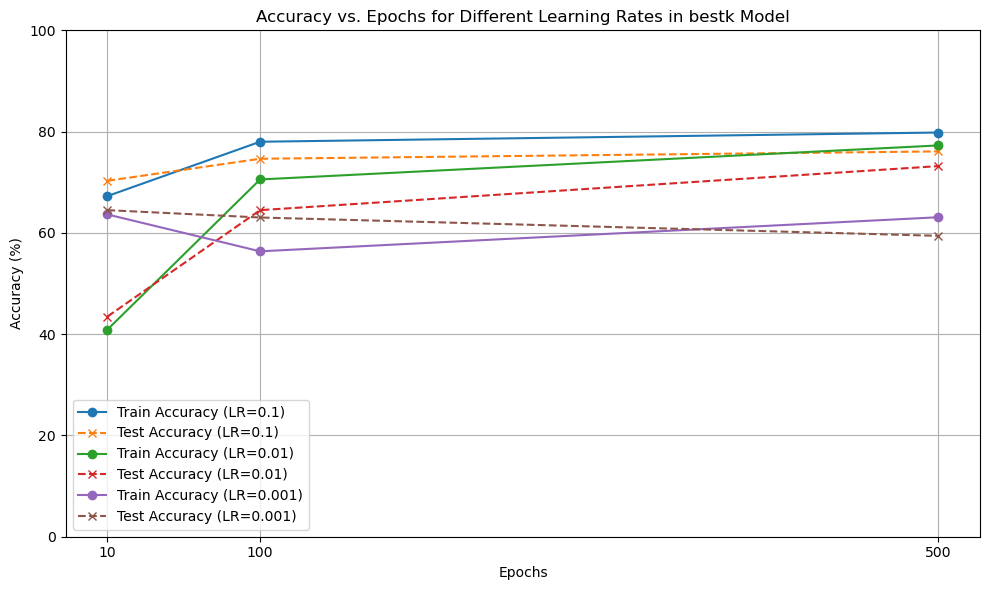

In [15]:
data = [
    (0.1, 10, 67.27, 70.29),
    (0.1, 100, 78.00, 74.64),
    (0.1, 500, 79.82, 76.09),
    (0.01, 10, 40.91, 43.48),
    (0.01, 100, 70.55, 64.49),
    (0.01, 500, 77.27, 73.19),
    (0.001, 10, 63.64, 64.49),
    (0.001, 100, 56.36, 63.04),
    (0.001, 500, 63.09, 59.42),
]

dataplt = {}
for lr, epoch, train_acc, test_acc in data:
    if lr not in dataplt:
        dataplt[lr] = ([], [], [])  # (epochs, train_acc, test_acc)
    dataplt[lr][0].append(epoch)
    dataplt[lr][1].append(train_acc)
    dataplt[lr][2].append(test_acc)

#draw
plt.figure(figsize=(10, 6))
for lr, (epochs, train_acc, test_acc) in dataplt.items():
    plt.plot(epochs, train_acc, marker='o', label=f'Train Accuracy (LR={lr})')
    plt.plot(epochs, test_acc, marker='x', linestyle='--', label=f'Test Accuracy (LR={lr})')

#plt setting
plt.title('Accuracy vs. Epochs for Different Learning Rates in bestk Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.xticks([10, 100, 500])
plt.ylim(0, 100)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


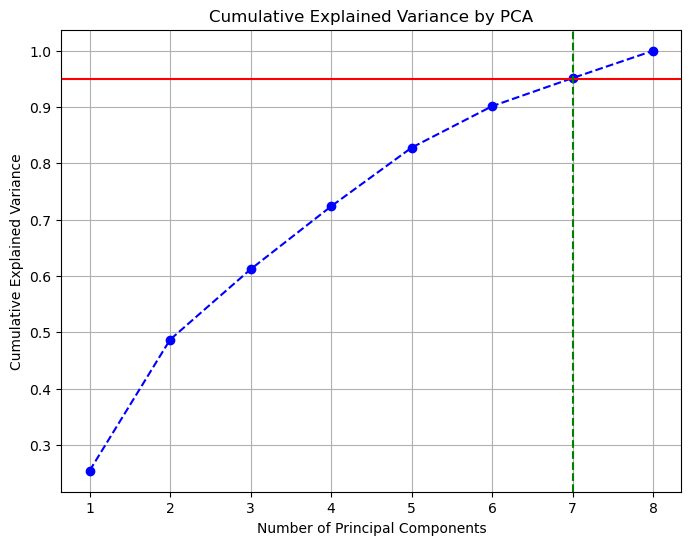

In [19]:

pca = PCA().fit(X_scaled)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by PCA')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-')
plt.axvline(x=np.argmax(cumulative_variance >= 0.95) + 1, color='g', linestyle='--') 
plt.show()
